# How to Train YOLOv9 on a Custom Dataset
---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/train-yolov9-model/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/XHT2c8jT3Bc)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [3]:
!nvidia-smi

Sat Oct 12 04:36:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   44C    P8              16W /  72W |      4MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [5]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q
!pip install ultralytics -q
!pip install -q roboflow

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 5.93 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [15]:
%cd {HOME}/yolov9

/content/yolov9


**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.

In [16]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("derbyuniobjdet").project("lightweight_objdetect")
version = project.version(7)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Lightweight_ObjDetect-7 in yolov9:: 100%|██████████| 19804/19804 [00:04<00:00, 4151.07it/s]


## Train Custom Model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/it_project/yolov9m_1/weights/last.pt")

model.train(data="/content/yolov9/Lightweight_ObjDetect-7/data.yaml", batch = 16, epochs=60, imgsz=640, project="/content/drive/MyDrive/it_project", name="yolov9m_1", resume=True, device=0)

Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/it_project/yolov9m_1/weights/last.pt, data=/content/yolov9/Lightweight_ObjDetect-7/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/it_project/, name=yolov9m_1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/it_project/yolov9m_1/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

train: Scanning /content/yolov9/Lightweight_ObjDetect-7/train/labels.cache... 6960 images, 176 backgrounds, 0 corrupt: 100%|██████████| 6960/6960 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/yolov9/Lightweight_ObjDetect-7/train/images/00033_00001_00021-2-_png_jpg.rf.0c7af5282deb07b49ed46155264a65b2.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12128, len(boxes) = 42336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/yolov9/Lightweight_ObjDetect-7/valid/labels.cache... 1937 images, 18 backgrounds, 0 corrupt: 100%|██████████| 1937/1937 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/yolov9/Lightweight_ObjDetect-7/valid/images/00014_00021_00002_png_jpg.rf.f4d68daffab7617a2568a418f5d990b0.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5430, len(boxes) = 11963. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /content/drive/MyDrive/it_project/yolov9m_1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 155 weight(decay=0.0), 162 weight(decay=0.0005), 161 bias(decay=0.0)
Resuming training /content/drive/MyDrive/it_project/yolov9m_1/weights/last.pt from epoch 48 to 100 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/it_project/yolov9m_1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.21G      1.191     0.9063       1.26        186        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:23<00:00,  2.64it/s]


                   all       1937      11963      0.812      0.701      0.765       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.24G      1.191     0.9106       1.26        155        640: 100%|██████████| 435/435 [02:46<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.69it/s]


                   all       1937      11963      0.768      0.757      0.776      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.16G      1.188     0.8998      1.251        130        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.79it/s]


                   all       1937      11963      0.787      0.728      0.763      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.14G      1.176     0.8941      1.252         86        640: 100%|██████████| 435/435 [02:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963       0.77      0.735      0.779      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.21G      1.175     0.8798      1.242        166        640: 100%|██████████| 435/435 [02:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.80it/s]


                   all       1937      11963      0.795      0.732      0.772      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.16G       1.16     0.8752      1.242        165        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963      0.761      0.769      0.775       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.24G      1.157     0.8681      1.242        132        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963      0.797      0.731      0.776      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.18G      1.152     0.8593      1.232        209        640: 100%|██████████| 435/435 [02:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.72it/s]


                   all       1937      11963      0.769       0.78      0.792      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.23G      1.149     0.8519      1.234        123        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:23<00:00,  2.61it/s]


                   all       1937      11963      0.822      0.707      0.782      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.36G      1.141     0.8456      1.227        205        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.81it/s]


                   all       1937      11963      0.784       0.75      0.783      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.22G      1.119     0.8365      1.219        193        640: 100%|██████████| 435/435 [02:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963      0.782      0.759      0.791      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.17G      1.133     0.8272       1.22        144        640: 100%|██████████| 435/435 [02:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963      0.845      0.716      0.784      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.19G      1.121      0.822      1.218         91        640: 100%|██████████| 435/435 [02:47<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.79it/s]


                   all       1937      11963      0.809      0.776      0.808      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       9.2G      1.116     0.8069      1.209        165        640: 100%|██████████| 435/435 [02:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963      0.837      0.712      0.792      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.18G      1.097     0.8004      1.202        153        640: 100%|██████████| 435/435 [02:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.72it/s]


                   all       1937      11963      0.816      0.745      0.798        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.15G      1.098     0.7941      1.202        132        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.81it/s]


                   all       1937      11963      0.829      0.727      0.798      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.19G      1.093     0.7884      1.199        113        640: 100%|██████████| 435/435 [02:49<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:23<00:00,  2.56it/s]


                   all       1937      11963      0.835      0.739      0.792      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.17G      1.094     0.7862      1.199        205        640: 100%|██████████| 435/435 [02:47<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.69it/s]


                   all       1937      11963      0.788      0.759      0.801      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.21G      1.084     0.7827      1.192        139        640: 100%|██████████| 435/435 [02:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.70it/s]


                   all       1937      11963      0.817       0.75        0.8      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.17G      1.084     0.7726       1.19        110        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963      0.805       0.75      0.801      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.24G      1.075     0.7732      1.184        137        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.81it/s]


                   all       1937      11963      0.829      0.755      0.805      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.21G      1.069     0.7662      1.188        126        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.72it/s]


                   all       1937      11963      0.802       0.77      0.803      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.16G      1.058     0.7539      1.183        189        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.73it/s]


                   all       1937      11963      0.841      0.754        0.8      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.12G      1.053     0.7467       1.18        115        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.80it/s]


                   all       1937      11963      0.824      0.761      0.796        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.29G      1.054     0.7446      1.175        176        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963      0.826      0.755      0.803      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       9.2G      1.046     0.7367       1.17        206        640: 100%|██████████| 435/435 [02:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963      0.825      0.765      0.803      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.21G      1.036     0.7326      1.164        162        640: 100%|██████████| 435/435 [02:47<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.80it/s]


                   all       1937      11963      0.791      0.769      0.803      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.13G      1.029     0.7254      1.161        119        640: 100%|██████████| 435/435 [02:47<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.70it/s]


                   all       1937      11963      0.847      0.735      0.795      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.21G      1.041     0.7304      1.165        132        640: 100%|██████████| 435/435 [02:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.69it/s]


                   all       1937      11963      0.817      0.763        0.8      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.21G      1.054      0.749      1.172        149        640: 100%|██████████| 435/435 [02:47<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.80it/s]


                   all       1937      11963      0.843       0.75      0.802      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.25G      1.037      0.738      1.171        122        640: 100%|██████████| 435/435 [02:47<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.79it/s]


                   all       1937      11963      0.762      0.781      0.799      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.19G        inf     0.7312       1.17        116        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963      0.845      0.746      0.798      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.22G      1.035     0.7191      1.164        180        640: 100%|██████████| 435/435 [02:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.81it/s]


                   all       1937      11963      0.833       0.75      0.804       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       9.2G       1.02     0.7171      1.158        152        640: 100%|██████████| 435/435 [02:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.72it/s]


                   all       1937      11963      0.804      0.766      0.805      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.24G      1.027     0.7217      1.162        166        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.82it/s]


                   all       1937      11963      0.855       0.74      0.806      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.12G      1.022     0.7142      1.158        137        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.81it/s]


                   all       1937      11963      0.796      0.769      0.803      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.21G      1.003     0.6954      1.147        150        640: 100%|██████████| 435/435 [02:45<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:24<00:00,  2.46it/s]


                   all       1937      11963      0.843      0.745      0.801      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.23G     0.9953     0.6913      1.142        115        640: 100%|██████████| 435/435 [02:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.81it/s]


                   all       1937      11963      0.813      0.752      0.802      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.22G     0.9957     0.6937      1.145        137        640: 100%|██████████| 435/435 [02:45<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:24<00:00,  2.53it/s]


                   all       1937      11963      0.784       0.77      0.799      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.17G     0.9939     0.6863      1.146        182        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.80it/s]


                   all       1937      11963      0.845      0.743        0.8      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.24G     0.9824     0.6763      1.136        167        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.75it/s]


                   all       1937      11963      0.856       0.74      0.803      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.23G     0.9928     0.6797      1.138        134        640: 100%|██████████| 435/435 [02:47<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.72it/s]


                   all       1937      11963      0.831      0.754      0.804      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.23G     0.9825     0.6746      1.136        163        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.82it/s]


                   all       1937      11963       0.85      0.752      0.808      0.613
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       9.1G     0.9949     0.5972      1.154         95        640: 100%|██████████| 435/435 [02:43<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:23<00:00,  2.55it/s]


                   all       1937      11963      0.829      0.752      0.804      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.18G     0.9765     0.5826      1.145         97        640: 100%|██████████| 435/435 [02:43<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.80it/s]


                   all       1937      11963      0.831      0.755      0.805       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.15G     0.9656     0.5773      1.141        114        640: 100%|██████████| 435/435 [02:45<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.72it/s]


                   all       1937      11963      0.801      0.759      0.804      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.14G     0.9563     0.5692      1.129         78        640: 100%|██████████| 435/435 [02:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.73it/s]


                   all       1937      11963      0.787      0.771      0.801      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.12G     0.9471     0.5596       1.13         81        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.81it/s]


                   all       1937      11963      0.778      0.777      0.802      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.16G      0.943     0.5592      1.124        112        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:23<00:00,  2.62it/s]


                   all       1937      11963      0.802      0.773       0.81      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.16G      0.934      0.554      1.123         78        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.81it/s]


                   all       1937      11963      0.808       0.77      0.812      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.17G     0.9309      0.547       1.12        109        640: 100%|██████████| 435/435 [02:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963      0.804      0.771      0.814      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.12G     0.9224     0.5425      1.115         77        640: 100%|██████████| 435/435 [02:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963       0.81      0.766      0.813       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.15G     0.9231     0.5415      1.115        111        640: 100%|██████████| 435/435 [02:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.82it/s]


                   all       1937      11963      0.812      0.764      0.813       0.61

53 epochs completed in 2.810 hours.
Optimizer stripped from /content/drive/MyDrive/it_project/yolov9m_1/weights/last.pt, 34.1MB
Optimizer stripped from /content/drive/MyDrive/it_project/yolov9m_1/weights/best.pt, 34.1MB

Validating /content/drive/MyDrive/it_project/yolov9m_1/weights/best.pt...
Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv9m summary (fused): 392 layers, 16,618,372 parameters, 0 gradients, 60.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:22<00:00,  2.71it/s]


                   all       1937      11963      0.856       0.74      0.806      0.613
            ahead only         51         53      0.922      0.898       0.94      0.863
   ahead or right turn         13         13      0.952      0.923      0.986      0.958
  arrow double traffic          6          6          1      0.921      0.995      0.664
                   bag         30         50      0.974      0.754      0.926      0.421
       bend ahead left         10         10      0.947        0.9      0.957      0.935
      bend ahead right         13         13      0.875      0.769      0.843      0.774
               bicycle        241        512      0.871      0.513      0.668      0.434
                 block          2          3      0.697          1      0.995      0.653
                   bus         97        150      0.812      0.407      0.597      0.401
              bus only          4          4      0.808       0.75      0.945      0.591
                   ca

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd106fad420>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls /content/drive/MyDrive/it_project/yolov9m_1

confusion_matrix.png				    P_curve.png       train_batch2.jpg
events.out.tfevents.1709205293.f80636ca2632.2700.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					    R_curve.png       val_batch0_pred.jpg
hyp.yaml					    results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				    results.png       val_batch1_pred.jpg
labels.jpg					    train_batch0.jpg  weights
opt.yaml					    train_batch1.jpg


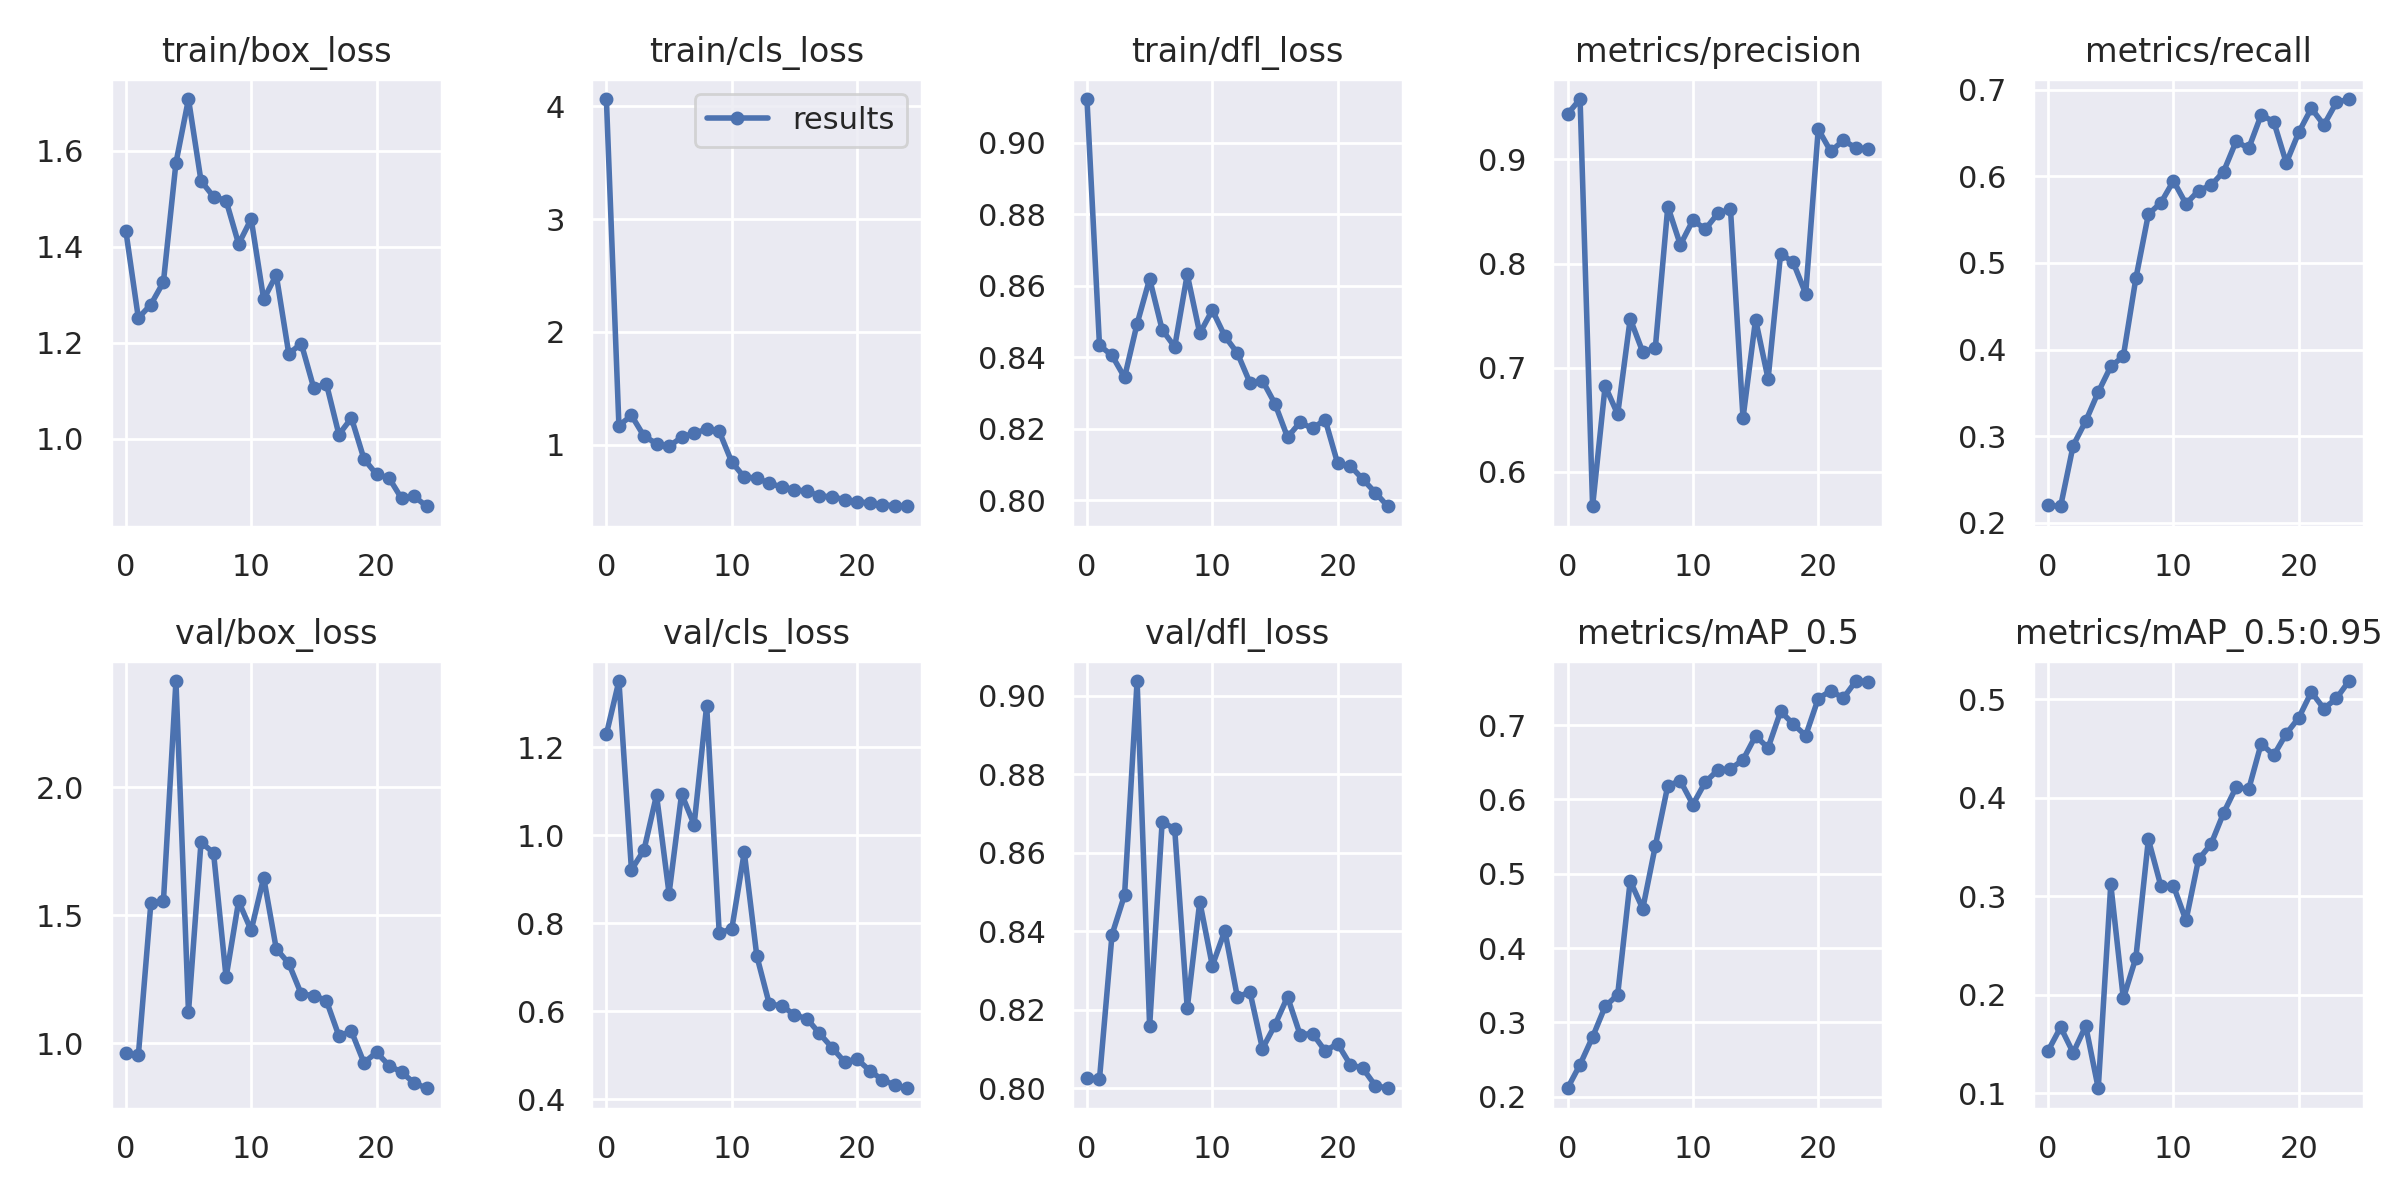

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

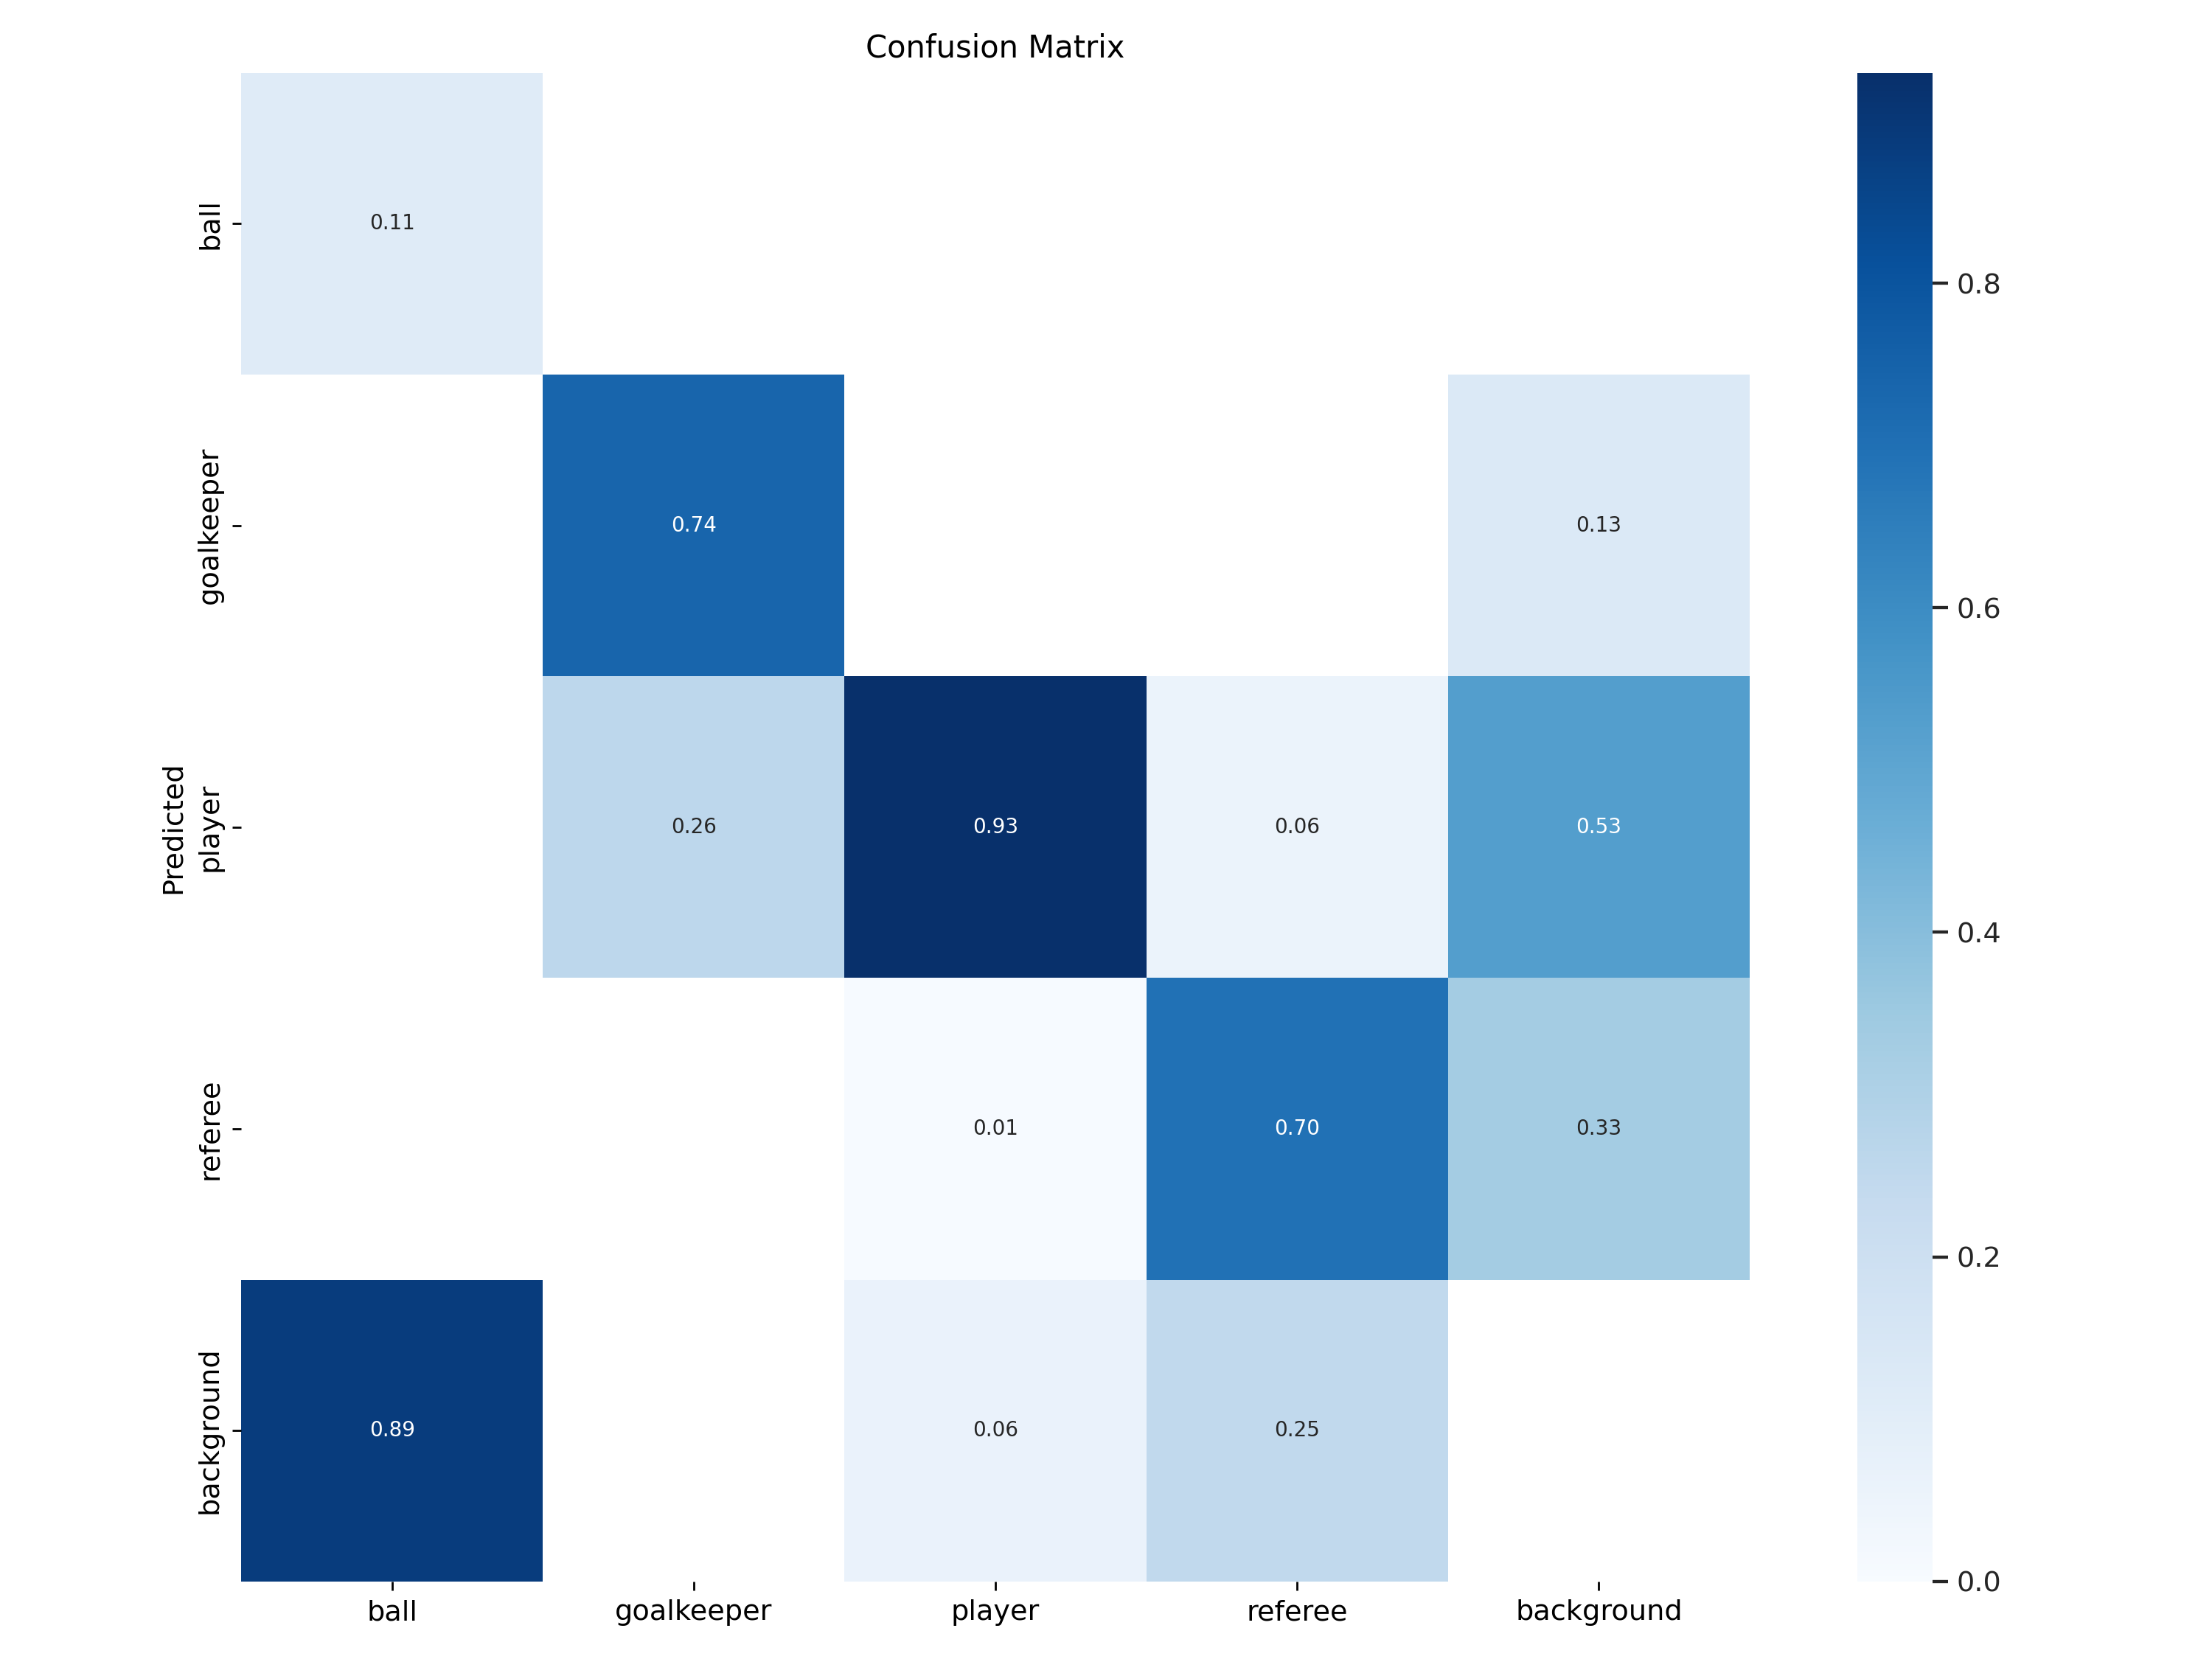

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/football-players-detection-6/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/football-players-detection-6/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:04<00:00,  2.22s/it]
                   all         38        905       0.91      0.689      0.759      0.528
                  ball     

## Inference with Custom Model

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images